In [1]:
### ATOC7500 - eof_example_NH_PSL_cartopy
### Coded by Jennifer Kay with help from Elizabeth Maroon, Vineel Yettella (University of Colorado)
### Last updated September 30, 2020

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd  # library for data analysis for text files (everything but netcdf files)
import xarray  #package that open and manipulates netcdf files
import matplotlib.dates as mdates
import numpy.linalg as LA
from matplotlib.gridspec import GridSpec
import timeit
#from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import os

In [2]:
os.chdir('/Users/chwy8767/Google Drive/ATOC_7500_Data_Analysis/3_Matrix_Methods/L8')

In [4]:
### Read in the data
fid=xarray.open_dataset('b.e11.B20TRC5CNBDRD.f09_g16.003.cam.h0.PSL.192001-200512.nc')
### Note: CAM writes out the time as the end time.  
### See https://ncar.github.io/CAM/doc/build/html/users_guide/model-output.html - 7.4 Timestamps and time intervals
### We want to use the beginning of the month. We can use the time_bnds variable to get replace time.
tbounds=fid['time_bnds'].isel(nbnd=0) ##  pick out beginning of bound, first index of bound.
fid['time']=tbounds.values  ## replace time with beginning of bound.
# print(fid['time']) ## check that the first time is now Jan 1.
lon=fid["lon"]
lat=fid["lat"]
time=fid["time"]
global_data=fid["PSL"] ## original data are in Pascals
print("shape of global data",np.shape(global_data))
#print(np.shape(time))

read in the monthly data from CESM
<xarray.DataArray 'time' (time: 1032)>
array([cftime.DatetimeNoLeap(1920, 1, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1920, 2, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1920, 3, 1, 0, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(2005, 10, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2005, 11, 1, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2005, 12, 1, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1920-01-01 00:00:00 ... 2005-12-01 00:00:00
shape of global data (1032, 192, 288)


In [18]:
fid

<xarray.Dataset>
Dimensions:       (ilev: 31, lat: 192, lev: 30, lon: 288, nbnd: 2, slat: 191, slon: 288, time: 1032)
Coordinates:
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * slat          (slat) float64 -89.53 -88.59 -87.64 ... 87.64 88.59 89.53
  * slon          (slon) float64 -0.625 0.625 1.875 3.125 ... 355.6 356.9 358.1
  * time          (time) object 1920-01-01 00:00:00 ... 2005-12-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    P0            float64 1e+05
    PSL           (time, lat, lon) float32 ...
    ch4vmr        (time) float64 9.782e-07 9.786e-07 ... 1.754e-06 1.754e-06
    co2vmr        (time) float64 0.0003031 0.0003031 ... 0.0003788 0.0003788
    date          (time) int32 19200201 19200301 19200401 ... 20051201 20060101
    date_written  (time) |S8 b'08/23/13' b'08/23/13' ... b'09/01/13' b'09/01/13'
    datesec       (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    f11vmr        (time) float64 3.846e-11 3.848e-11 ... 7.087e-10 7.087e-10
    f12vmr        (time) float64 0.0 0.0 0.0 ... 5.394e-10 5.394e-10 5.394e-10
    gw            (lat) float64 3.382e-05 0.0002705 ... 0.0002705 3.382e-05
    hyai          (ilev) float64 0.002255 0.005032 0.01016 ... 0.003979 0.0 0.0
    hyam          (lev) float64 0.003643 0.007595 0.01436 ... 0.001989 0.0
    hybi          (ilev) float64 0.0 0.0 0.0 0.0 ... 0.9389 0.9636 0.9851 1.0
    hybm          (lev) float64 0.0 0.0 0.0 0.0 ... 0.9251 0.9512 0.9743 0.9926
    mdt           int32 1800
    n2ovmr        (time) float64 2.829e-07 2.83e-07 ... 3.194e-07 3.194e-07
    nbdate        int32 19200101
    nbsec         int32 0
    ndbase        int32 0
    ndcur         (time) int32 31 59 90 120 151 ... 31298 31329 31359 31390
    nlon          (lat) int32 288 288 288 288 288 288 ... 288 288 288 288 288
    nsbase        int32 0
    nscur         (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    nsteph        (time) int32 1488 2832 4320 5760 ... 1503792 1505232 1506720
    ntrk          int32 1
    ntrm          int32 1
    ntrn          int32 1
    sol_tsi       (time) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    time_bnds     (time, nbnd) object 1920-01-01 00:00:00 ... 2006-01-01 00:0...
    time_written  (time) |S8 b'17:55:00' b'18:03:38' ... b'04:55:39' b'05:05:44'
    w_stag        (slat) float64 0.0001353 0.0004058 ... 0.0004058 0.0001353
    wnummax       (lat) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Attributes:
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B20TRC5CNBDRD.f09_g16.003
    title:                     UNSET
    logname:                   mai
    host:                      ys0614
    Version:                   $Name$
    revision_Id:               $Id$
    initial_file:              b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-...
    topography_file:           /glade/p/cesm/cseg//inputdata/atm/cam/topo/USG...
    history:                   Tue Sep  3 01:52:35 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [5]:
### STEP #1 - PREPARE YOUR DATA FOR ANALYSIS

### Subset the data
print('subset to just Northern Hemisphere')
minlat=20
maxlat=90
minlon=0
maxlon=360
nh_data=fid["PSL"].sel(lat=slice(minlat,maxlat)).sel(lon=slice(minlon,maxlon))
nh_lon=fid["lon"].sel(lon=slice(minlon,maxlon))
nh_lat=fid["lat"].sel(lat=slice(minlat,maxlat))
nyrs=50
#nh_data=nh_data[0:12*nyrs,:,:]
print(type(nh_data)) ## check that the data is Xarray

### this would work with numpy or xarray arrays.
#print("shape of data",np.shape(nh_data))
#index=sorted(np.concatenate((range(0,len(nh_data),12),range(1,len(nh_data),12),range(11,len(nh_data),12))))
#print(np.shape(index))
#print(index)
#nh_data=nh_data[index,:,:] 
print("shape of data",np.shape(nh_data))

### Let's try the slicker away with Xarray
nh_data=nh_data.sel(time=slice('1920-01-01','1970-01-01'))
nh_data = nh_data[nh_data['time.season'] == 'DJF']
print(nh_data.shape)

### try summer months or just December
#nh_data = nh_data[nh_data['time.season'] == 'JJA']
#nh_data=nh_data[::12,:,:]

### weight the data by the square root of the cosine, Following Hannachi et al. 2007 pg 1123
### note: SVD and eigenanalysis give same results when you weight the data matrix by sqrt(cosine(lat))
#print(lat)
nh_data=nh_data*np.sqrt(np.cos(lat*np.pi/180)) ##np.sqrt(np.cos(nh_lat*np.pi/180))

X=nh_data/100 ## convert from Pa to mb or hPa
print("shape of data",np.shape(X))

subset to just Northern Hemisphere
<class 'xarray.core.dataarray.DataArray'>
shape of data (1032, 75, 288)
(151, 75, 288)
shape of data (151, 75, 288)


In [6]:
### STEP #1 - PREPARE YOUR DATA FOR ANALYSIS

## Flatten the [lat,lon] grid into time x location shape
## Reshape the data
a,b,c=np.shape(X)
print(a,b,c)
Y=X.values.reshape(a,b*c)

## remove the sample mean 
sample_mean = X.mean('time');
X_removemean= X - sample_mean

## divide by the standard deviation
X_stand= X_removemean/(X_removemean.std('time'));
#print(np.shape(X_stand.values))

151 75 288


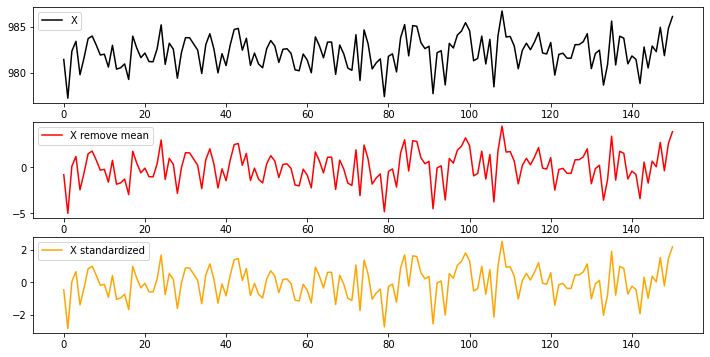

In [7]:
## Plot one point to make sure the data have the mean removed and have been standardized
## Check to make sure this happened locally as I was having some issues with the programming
## and instead was removing the entire sample mean
f=plt.figure(figsize=(12,6))
gs=GridSpec(3,1)
plt.subplot(gs[0,0])
plt.plot(X[:,1,1],label='X',color='black')
plt.legend()
plt.subplot(gs[1,0])
plt.plot(X_removemean[:,1,1],label='X remove mean',color='red')
plt.legend()
plt.subplot(gs[2,0])
plt.plot(X_stand[:,1,1],label='X standardized',color='orange')
plt.legend();

X_stand (151, 75, 288)
Y_stand (151, 21600)


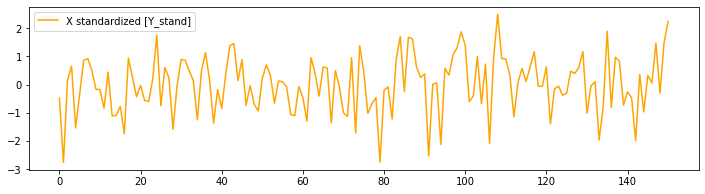

In [45]:
### STEP #1 - PREPARE YOUR DATA FOR ANALYSIS (continued)

## Flatten the [lat,lon] grid into time x location shape
## this takes some time since the array is big 50 x 75 x 288 -> 50 x 21600
Y_stand=X_stand.values.reshape(a,b*c)
print('X_stand',np.shape(X_stand))
print('Y_stand',np.shape(Y_stand))

##plot the standardized and original time series for one location
f=plt.figure(figsize=(12,3))
# plt.plot(X.values.reshape(a,b*c)[:,1],label='X',color='black');
plt.plot(Y_stand[:,1],label='X standardized [Y_stand]',color='orange');
plt.legend();

### At the end of this first step you want two matrices ready for EOF analysis
### Y_stand = standardized data, dimensioned (time,location)
### Y = original data, dimensioned (time,location)
### everything below in the code assumes that you have Y_stand, Y defined as above

In [7]:
### STEP #2 - Calculate the EOFs -- Using eigenanalysis of the covariance matrix (the np.linalg.eig method)
##(don't do this, 21600 in the structure dimension -- this is going to crash your computer)

**Barnes Ch 3 (69) $X=U \Sigma V^{T}$**

In [9]:
### STEP #2 - Calculate the EOFs -- Using Singular Value Decomposition (SVD) (the np.linalg SVD method)
### Why is this method so much faster?
### Note the option to set full_matrics=False.  You don't need to find 21600 EOFs!
## This option set to false limits the number of EOFs to the sampling dimension (here 50)
## from vineel [eofs, s, v] = np.linalg.svd(X.T, full_matrices=False) 

start_time = timeit.default_timer()
u,s,v=LA.svd(Y_stand,full_matrices=False)  ## Barnes Chapter 3 Equation (65)
elapsed = timeit.default_timer() - start_time
print('Time elapsed in LA SVD method: ',elapsed,' seconds')
print(np.shape(u))

Time elapsed in LA SVD method:  2.382099840997398  seconds
(151, 151)


Percent variance explained by EOF1 in CESM: 27.0 %
Percent variance explained by EOF1 in Obs: 21%
Percent variance explained by EOF2 in CESM: 10.0 %
Percent variance explained by EOF2 in Obs:  13%


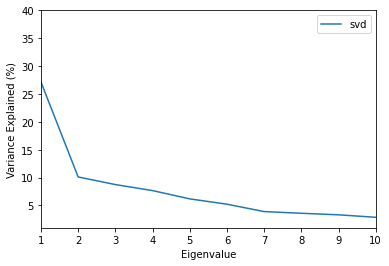

In [10]:
### STEP #3 - Plot the eigenvalues including errors bars following North et al. 1982.

# convert eigenvalues to percent variance explained
pve2 = 100.*np.abs(s**2)/np.sum(np.abs(s**2))
print('Percent variance explained by EOF1 in CESM:',np.round(pve2[0],0),'%')
print('Percent variance explained by EOF1 in Obs:','21%')
print('Percent variance explained by EOF2 in CESM:',np.round(pve2[1],0),'%')
print('Percent variance explained by EOF2 in Obs:  13%')
## Hannachi et al. 2007 report observations show EOF1=21% variance, EOF2=13% variance

f=plt.figure()
plt.plot(np.arange(1,len(pve2)+1),pve2,label='svd')
plt.ylim([1,40])
plt.xlim([1,10])
plt.ylabel('Variance Explained (%)')
plt.xlabel('Eigenvalue')
plt.legend()

In [11]:
### STEP 4 - Find the first two EOF patterns and PC timeseries 

# select an EOF
eof_num=1

# Find the eigenvector (e1) associated with "eof_num" from the SVD method
print(np.shape(v),np.shape(s),np.shape(u))
e1 = (v[eof_num-1,:]).reshape(b,c)
print(np.shape(e1))

# Calculate the principal component (z1) associated with "eof_num" from the SVD method
z1 = u[:,eof_num-1]*(s[eof_num-1])
## standardize it
z1 = (z1-np.mean(z1))/np.std(z1)  
print(np.shape(z1))

# select an EOF
eof_num=2

# Find the eigenvector (e1) associated with "eof_num" from the SVD method
e2 = (v[eof_num-1,:]).reshape(b,c)
print(np.shape(e1))

# Calculate the principal component (z1) associated with "eof_num" from the SVD method
z2 = u[:,eof_num-1]*(s[eof_num-1])
## standardize it
z2 = (z2-np.mean(z2))/np.std(z2)  
print(np.shape(z2))

(151, 21600) (151,) (151, 151)
(75, 288)
(151,)
(75, 288)
(151,)


/opt/anaconda3/envs/ATOC_7500_DA_env/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
/opt/anaconda3/envs/ATOC_7500_DA_env/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


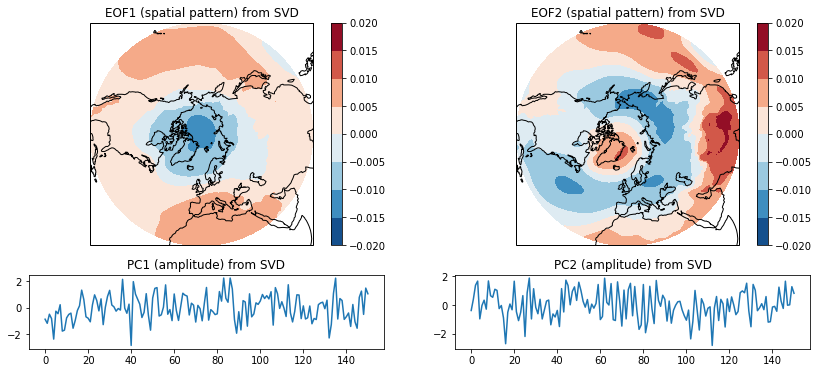

In [12]:
### Make a 4-panel plot showing the eigenvector (spatial pattern) and principal component (amplitude)

f=plt.figure(figsize=(14,6))
gs=GridSpec(2,2,height_ratios=(3,1))

e1plot,lonplot=add_cyclic_point(e1,coord=lon.values)
levels=np.arange(-0.02,0.021,0.005)
ax=plt.subplot(gs[0,0],projection=ccrs.Stereographic(central_latitude=90,central_longitude=0))
CS=plt.contourf(lonplot,lat.sel(lat=slice(20,90)),e1plot,levels,cmap=plt.cm.RdBu_r,transform=ccrs.PlateCarree())  ##PlateCarree = Lat/Lon?
ax.set_extent([-180,180,20,90],crs=ccrs.PlateCarree())
ax.coastlines()
plt.title('EOF1 (spatial pattern) from SVD')
plt.colorbar(CS)
plt.subplot(gs[1,0])
plt.plot((z1))
plt.title('PC1 (amplitude) from SVD')

e2plot,lonplot=add_cyclic_point(e2,coord=lon.values)
ax=plt.subplot(gs[0,1],projection=ccrs.Stereographic(central_latitude=90,central_longitude=0))
CS=plt.contourf(lonplot,lat.sel(lat=slice(20,90)),e2plot,levels,cmap=plt.cm.RdBu_r,transform=ccrs.PlateCarree())  ##PlateCarree = Lat/Lon?
ax.set_extent([-180,180,20,90],crs=ccrs.PlateCarree())
ax.coastlines()
plt.title('EOF2 (spatial pattern) from SVD')
plt.colorbar(CS)
plt.subplot(gs[1,1])
plt.plot((z2))
plt.title('PC2 (amplitude) from SVD')

plt.tight_layout() ## removes overlap between figure panels

In [13]:
### STEP 5) Regress the data (unweighted data if applicable) onto standardize values of the PC 
### for eof_num above

# calculate d for plotting in physical units, not standardized/weighted units.
## d1 is in physical units (in this case degrees) and denotes the anomaly associated with 1 standard deviation
## of z1 (principal component, time variation in this case)
#print(np.max(X.values))
#print(np.min(X.values))
#print(np.shape(Yorig))
#print(np.shape(np.transpose(z)))
d1 = (1./np.size(Y,axis=0))*np.dot(np.transpose(z1),Y)   ## Barnes Chapter 3 Equation (79)
#print(np.shape(d1))
d1plot = d1.reshape(b,c)  ### this is the reshaped eigenvector to plot
print(np.shape(d1plot))
print(min(d1))
print(max(d1))
d2 = (1./np.size(Y,axis=0))*np.dot(np.transpose(z2),Y)   ## Barnes Chapter 3 Equation (79)
d2plot = d2.reshape(b,c)  ### this is the reshaped eigenvector to plot

# calculate d for plotting in standardized/weighted units
## d1s is in standardized units (in other words, no units) and denotes the anomaly associated with 1 standard deviation
## of z1 (principal component, time variation in this case)
d1s = (1./np.size(Y_stand,axis=0))*np.dot(np.transpose(z1),Y_stand)
#print(np.shape(d1))
d1splot = d1s.reshape(b,c)  ### this is the reshaped eigenvector to plot
#print(np.shape(d1splot))
print(min(d1s))
print(max(d1s))
d2s = (1./np.size(Y_stand,axis=0))*np.dot(np.transpose(z2),Y_stand)
d2splot = d2s.reshape(b,c)  ### this is the reshaped eigenvector to plot

(75, 288)
-3.9406427280142733
3.125440793792075
-0.8836877405895893
0.6109173841333749


/opt/anaconda3/envs/ATOC_7500_DA_env/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


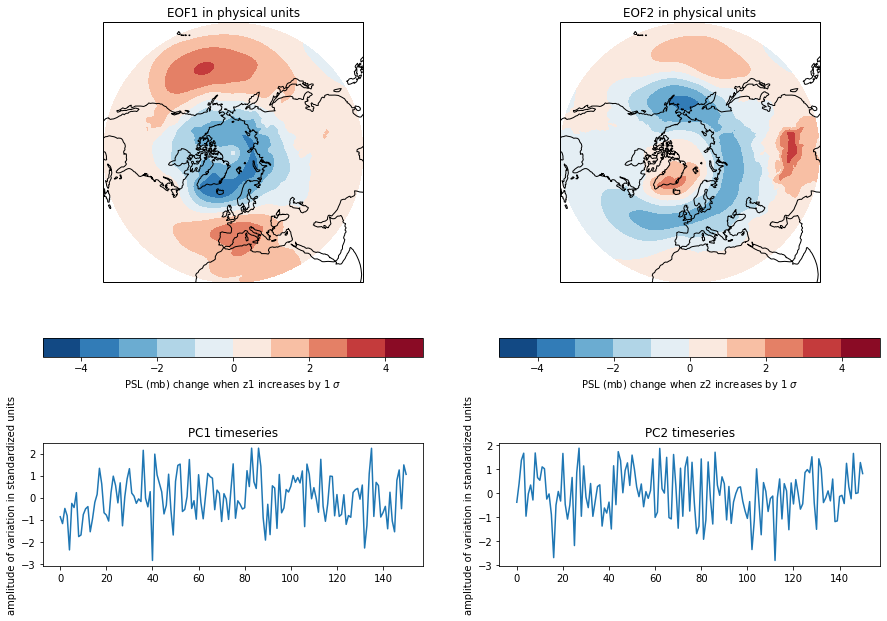

In [14]:
### Make a 4-panel plot
#print(np.shape(np.transpose(d1.reshape(b,c))))

f=plt.figure(figsize=(15,10))
gs=GridSpec(2,2,height_ratios=(3,1))

d1plotme,lonplot=add_cyclic_point(d1plot,coord=lon.values)
levels2=np.arange(-5.0,5.1,1)
ax=plt.subplot(gs[0,0],projection=ccrs.Stereographic(central_latitude=90,central_longitude=0))
CS=plt.contourf(lonplot,lat.sel(lat=slice(20,90)),d1plotme,levels2,cmap=plt.cm.RdBu_r,transform=ccrs.PlateCarree())  ##PlateCarree = Lat/Lon?
ax.set_extent([-180,180,20,90],crs=ccrs.PlateCarree())
ax.coastlines()
cb=plt.colorbar(CS,orientation='horizontal')
cb.set_label('PSL (mb) change when z1 increases by 1 $\sigma$')
plt.title('EOF1 in physical units')
plt.subplot(gs[1,0])
plt.plot(z1)
plt.ylabel('amplitude of variation in standardized units')
plt.title('PC1 timeseries')

d2plotme,lonplot=add_cyclic_point(d2plot,coord=lon.values)
ax=plt.subplot(gs[0,1],projection=ccrs.Stereographic(central_latitude=90,central_longitude=0))
CS=plt.contourf(lonplot,lat.sel(lat=slice(20,90)),d2plotme,levels2,cmap=plt.cm.RdBu_r,transform=ccrs.PlateCarree())  ##PlateCarree = Lat/Lon?
ax.set_extent([-180,180,20,90],crs=ccrs.PlateCarree())
ax.coastlines()
cb=plt.colorbar(CS,orientation='horizontal')
cb.set_label('PSL (mb) change when z2 increases by 1 $\sigma$')
plt.title('EOF2 in physical units')
plt.subplot(gs[1,1])
plt.plot(z2)
plt.ylabel('amplitude of variation in standardized units')
plt.title('PC2 timeseries');